# Stock Adjusted Sharpe Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2022-07-01' #input
symbol = 'RELIANCE.NS'

In [3]:
df = yf.download("RELIANCE.NS", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def adj_sharpe_ratio(stock_returns, rf):
    sharpe_ratio = (stock_returns.mean() - rf) / stock_returns.std()
    stock_skewness = scs.skew(stock_returns)
    stock_kurtosis = stock_returns.kurtosis()
    Adj_SR = sharpe_ratio * (1 + (stock_skewness / 6.0) * sharpe_ratio + (stock_kurtosis - 3) / 24.0 * sharpe_ratio**2)
    return Adj_SR

Text(0, 0.5, 'Adjusted Sharpe Ratio')

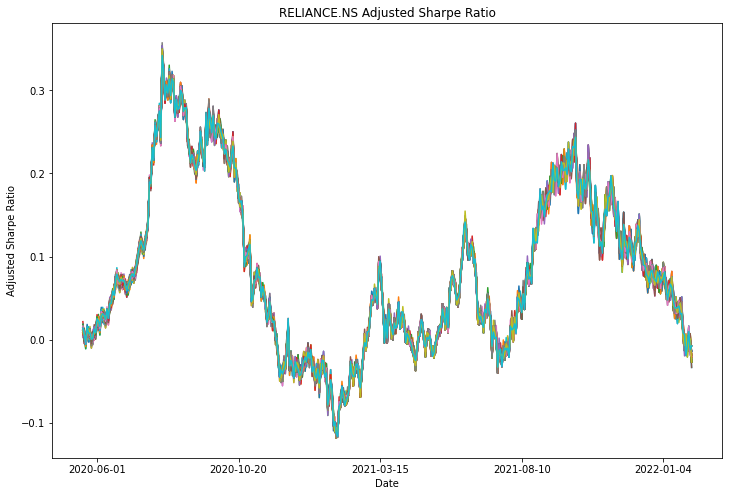

In [7]:
# Compute the running Adjusted Sharpe ratio
running_sharpe = [adj_sharpe_ratio(returns[i-90:i], rf[i-90:i]) for i in range(90, len(returns))]

# Plot running Adjusted Sharpe ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running_sharpe[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df['Adj Close'].index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Adjusted Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Adjusted Sharpe Ratio')

In [8]:
adj_sharpe_ratio(returns, rf)

Date
2020-01-03 00:00:00-05:00    0.050734
2020-01-06 00:00:00-05:00    0.055535
2020-01-07 00:00:00-05:00    0.050734
2020-01-08 00:00:00-05:00    0.041159
2020-01-09 00:00:00-05:00    0.045938
                               ...   
2022-06-24 00:00:00-04:00    0.060327
2022-06-27 00:00:00-04:00    0.050734
2022-06-28 00:00:00-04:00    0.041156
2022-06-29 00:00:00-04:00    0.045948
2022-06-30 00:00:00-04:00    0.045945
Name: Adj Close, Length: 628, dtype: float64